# Studi Kasus Employee Churn

Tim **The Jammaths**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, \
                                    cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_curve, \
                            PrecisionRecallDisplay, confusion_matrix, \
                            ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.inspection import permutation_importance

%matplotlib inline

In [ ]:
df = pd.read_csv('employee_churn.csv')

Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

## Soal:

1. (30 POIN) Lakukan explorasi dan visualisasi data secara bebas dan tulislah (dalam poin-poin) insights yang Anda peroleh. Berikan minimal 7 poin-poin. 
2. (20 POIN) Lakukanlah data preparation yang diperlukan (misal: mengubah kolom kategorikal menjadi kolom numerikal, dst). Tuliskanlah langkah-langkah yang Anda lakukan dalam tahap ini. 
3. (20 POIN) Tentukan False Positive dan False Negative dari kasus ini. Mana yang lebih 'penting' untuk diperhatikan? Mana yang lebih 'penting' untuk kita hindari? False Positive, atau False Negative? 
4. (30 POIN) Buatlah Machine Learning Model untuk mengklasifikasikan apakah employee akan Churn atau tidak. Kolom 'target' adalah kolom 'Churn'. Evaluasi-lah machine learning model Anda, dan tentukanlah metrik-metrik yang tepat untuk mengukur akurasi dari machine learning model tersebut. 

### Petunjuk:

1. Kerjakanlah pekerjaan kalian di bagian "Tempat Mengerjakan" (di bawah)
2. Jawablah keempat soal di atas di bagian "Jawaban". 

### Tempat Mengerjakan:

Note: Penjelasan lengkap terdapat pada *section* "Jawaban".

#### *Exploratory Data Analysis* (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   float64
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   int64  
 8   churn                       1033 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 72.8+ KB


In [ ]:
X = df.drop('churn', axis=1)
y = df['churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((826, 8), (207, 8), (826,), (207,))

EDA dilakukan hanya pada *training set*, karena kami menganggap *test set* sebagai data yang baru. Sehingga, tidak akan terjadi *data leakage*.

In [ ]:
df_train = pd.concat([X_train.reset_index().drop('index', axis=1), pd.DataFrame(y_train, columns=['churn'])], axis=1)
df_train.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,12252.0,50.19,3.0,bachelor/diploma,2.502478,45.073458,-81.671418,0,0
1,16687.0,69.58,4.0,bachelor/diploma,2.544895,46.418292,-90.885207,1,0
2,12751.0,40.37,2.0,bachelor/diploma,2.977177,46.940270,-80.323401,0,1
3,583.0,42.41,2.0,masters degree,2.158352,47.263911,-85.907794,0,1
4,12890.0,55.87,2.0,bachelor/diploma,3.154074,46.028086,-86.679346,0,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  826 non-null    float64
 1   bonus_salary_percentage     826 non-null    float64
 2   job_satisfaction            826 non-null    float64
 3   education_level             826 non-null    object 
 4   overtime_hour               826 non-null    float64
 5   company_latitude            826 non-null    float64
 6   company_longitude           826 non-null    float64
 7   gender                      826 non-null    int64  
 8   churn                       826 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 58.2+ KB


In [ ]:
df_train.describe()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,overtime_hour,company_latitude,company_longitude,gender,churn
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,10715.923729,52.132845,2.487893,3.072963,41.746904,-87.924628,0.510896,0.300242
std,3793.525502,13.721938,0.882406,0.639710,3.729878,8.072075,0.500184,0.458641
min,583.000000,5.000000,0.000000,1.000000,30.000000,-119.646200,0.000000,0.000000
25%,8146.750000,42.502500,2.000000,2.616025,38.943251,-93.157036,0.000000,0.000000
50%,10491.500000,51.015000,3.000000,3.056659,41.608694,-86.976296,1.000000,0.000000
75%,13141.250000,61.727500,3.000000,3.498335,44.358330,-81.776058,1.000000,1.000000
max,24786.000000,95.700000,5.000000,5.000000,53.488136,-66.385462,1.000000,1.000000


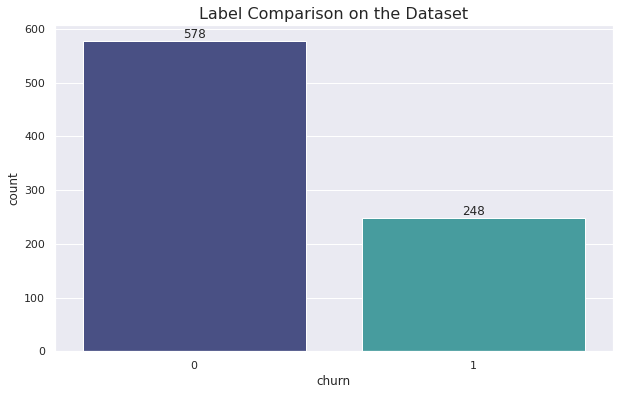

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

ax = sns.countplot(x=df_train['churn'], palette='mako')
ax.bar_label(ax.containers[0])
ax.set_title('Label Comparison on the Dataset', fontsize=16)
plt.show()

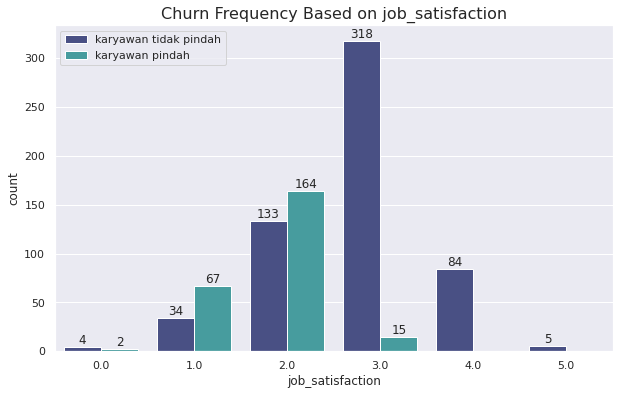

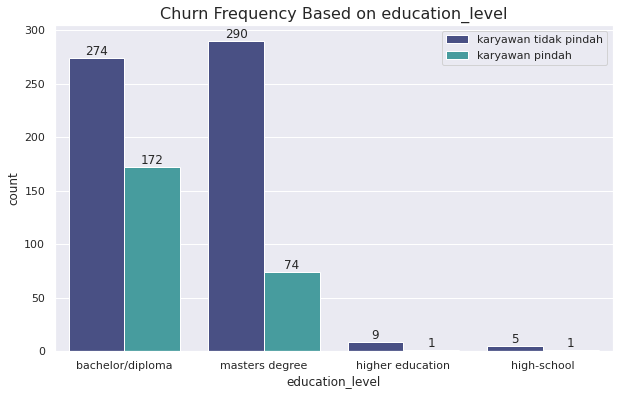

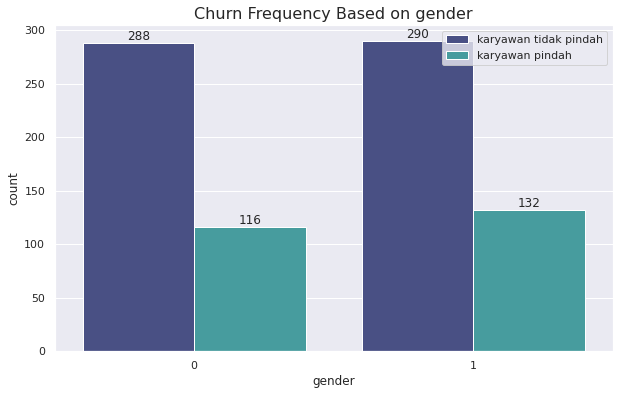

In [ ]:
for col in ['job_satisfaction', 'education_level', 'gender']:
    ax = sns.countplot(x=col, hue='churn', data=df_train, palette='mako')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('Churn Frequency Based on {}'.format(col), fontsize=16)
    plt.legend(['karyawan tidak pindah','karyawan pindah'])
    plt.show()

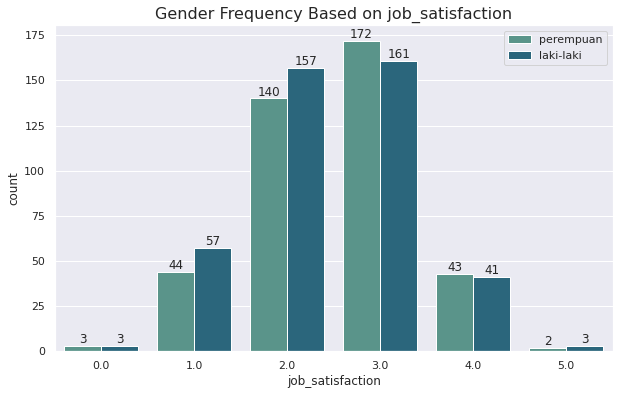

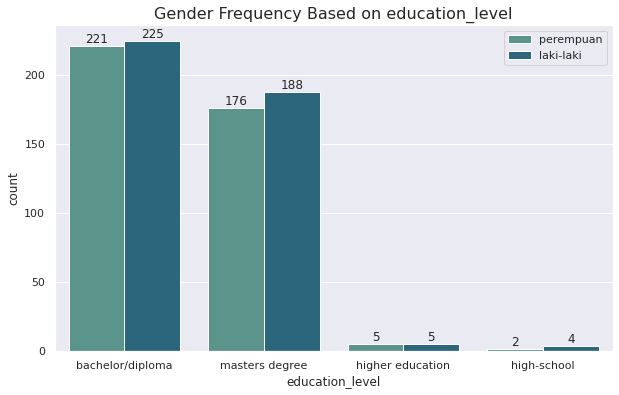

In [ ]:
for col in ['job_satisfaction', 'education_level']:
    ax = sns.countplot(x=col, hue='gender', data=df_train, palette='crest')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('Gender Frequency Based on {}'.format(col), fontsize=16)
    plt.legend(['perempuan', 'laki-laki'])
    plt.show()

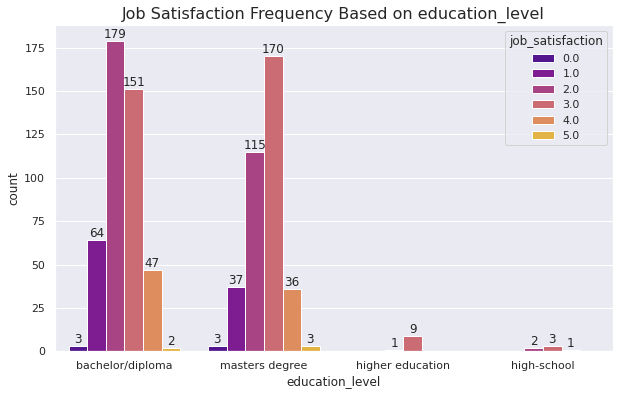

In [ ]:
ax = sns.countplot(x='education_level', hue='job_satisfaction', data=df_train, palette='plasma')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
ax.legend(loc='upper right', title='job_satisfaction')
ax.set_title('Job Satisfaction Frequency Based on education_level'.format(col), fontsize=16)
plt.show()

In [ ]:
fig = px.scatter_mapbox(df, lat="company_latitude", lon="company_longitude", color="churn",
                        size="job_satisfaction", 
                        color_discrete_sequence=px.colors.sequential.Viridis, 
                        size_max=15, zoom=2.5, width=1280, height=720,
                        mapbox_style="carto-positron")
fig.update_layout(title = 'Company Location', title_x=0.5)

fig.show()

# Scroll pada gambar untuk zoom in atau out, klik dan drag untuk menggeser gambar

In [ ]:
mean_df = df.describe().loc[['mean'], ['company_latitude', 'company_longitude', 'job_satisfaction']]
fig = px.scatter_mapbox(mean_df, lat="company_latitude", 
                        lon="company_longitude", size='job_satisfaction',
                        color_discrete_sequence=px.colors.sequential.Viridis, 
                        size_max=15, zoom=2.5, width=640, height=480,
                        mapbox_style="carto-positron")
fig.update_layout(title = 'Mean Company Location', title_x=0.5)
fig.show()

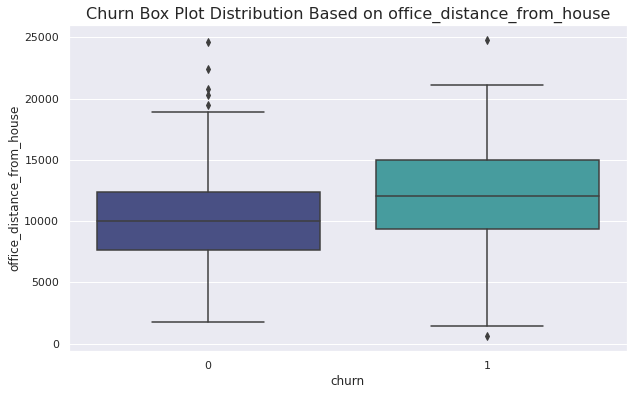

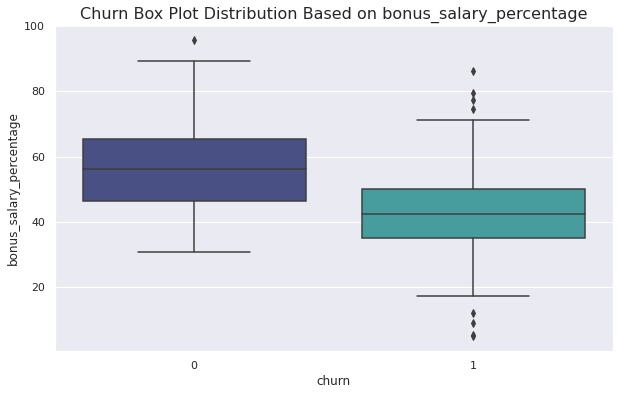

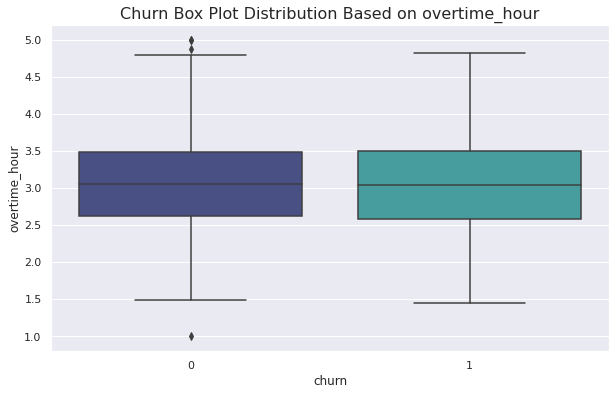

In [ ]:
for col in ['office_distance_from_house', 'bonus_salary_percentage', 'overtime_hour']:
    ax = sns.boxplot(x='churn', y=col, data=df_train, palette='mako')
    ax.set_title('Churn Box Plot Distribution Based on {}'.format(col), fontsize=16)
    plt.show()

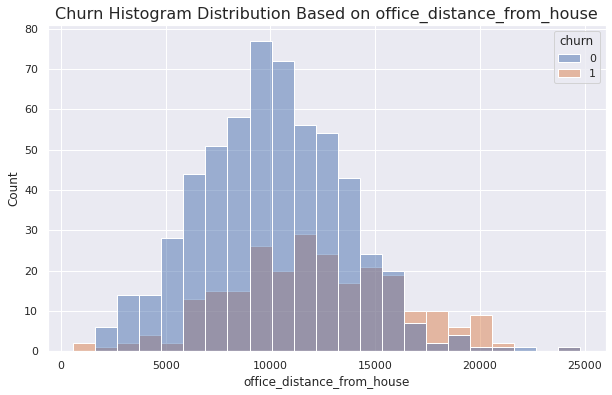

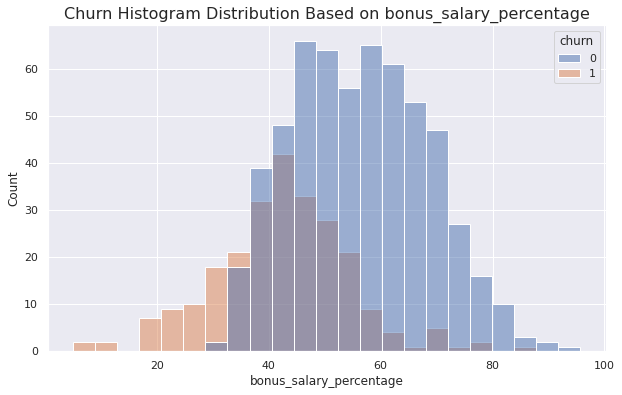

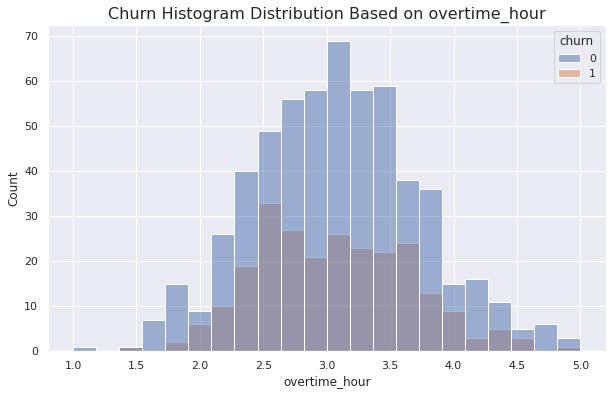

In [ ]:
for col in ['office_distance_from_house', 'bonus_salary_percentage', 'overtime_hour']:
    ax = sns.histplot(x=col, data=df_train, hue='churn')
    ax.set_title('Churn Histogram Distribution Based on {}'.format(col), fontsize=16)
    plt.show()

#### *Data Preparation*

In [ ]:
num_col = ['office_distance_from_house', 'bonus_salary_percentage', 'overtime_hour', 'company_latitude', 'company_longitude']
cat_col = ['education_level']

In [ ]:
col_trans = ColumnTransformer([
    ("num", StandardScaler(), num_col),
    ("cat", OneHotEncoder(), cat_col),
], remainder='passthrough')

X_train_prepared = col_trans.fit_transform(X_train)

#### *Modelling*

In [ ]:
for model in [LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), GradientBoostingClassifier()]:
    print(model, ':', cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='recall').mean())

LogisticRegression() : 0.8788571428571428
RandomForestClassifier() : 0.9313469387755102
SVC() : 0.9433469387755103
KNeighborsClassifier() : 0.9231020408163264
GradientBoostingClassifier() : 0.9393469387755102


In [ ]:
params = {'C': [0.002, 0.02, 0.2, 2.0, 20, 200],
          'gamma': [0.002, 0.02, 0.2, 2.0, 20, 200, 'scale', 'auto']}

grid_search1 = GridSearchCV(SVC(), params, scoring='recall', 
                            cv=5, n_jobs=-1)
grid_search1.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.002, 0.02, 0.2, 2.0, 20, 200],
                         'gamma': [0.002, 0.02, 0.2, 2.0, 20, 200, 'scale',
                                   'auto']},
             scoring='recall')

In [ ]:
pd.DataFrame(grid_search1.cv_results_).sort_values(['rank_test_score', 'mean_fit_time', 'mean_score_time'])\
[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time','mean_test_score']].reset_index(drop=True).head()

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_test_score
0,20,0.02,0.013793,0.004142,0.951429
1,2.0,auto,0.017184,0.006052,0.947347
2,2.0,scale,0.014418,0.004915,0.943347
3,200,0.02,0.019571,0.005032,0.939347
4,200,0.002,0.015205,0.004546,0.935102


In [ ]:
params = {'C': [10,12,14,16,18,20,22,24,26,28,30],
          'gamma': [0.02, 0.04, 0.06, 0.08]}

grid_search2 = GridSearchCV(SVC(), params, scoring='recall', 
                            cv=5, n_jobs=-1)
grid_search2.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                         'gamma': [0.02, 0.04, 0.06, 0.08]},
             scoring='recall')

In [ ]:
pd.DataFrame(grid_search2.cv_results_).sort_values(['rank_test_score', 'mean_fit_time', 'mean_score_time'])\
[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time','mean_test_score']].reset_index(drop=True).head()

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_test_score
0,10,0.08,0.028660,0.008530,0.955592
1,16,0.06,0.030894,0.005770,0.951592
2,10,0.06,0.020013,0.007666,0.951510
3,20,0.04,0.022767,0.005704,0.951510
4,16,0.04,0.022829,0.007864,0.951510


In [ ]:
params = {'C': [8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75,11],
          'gamma': [0.07,0.075,0.08,0.085,0.09,0.095,0.1]}

grid_search3 = GridSearchCV(SVC(), params, scoring='recall', 
                            cv=5, n_jobs=-1)
grid_search3.fit(X_train_prepared, y_train.ravel())

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [8.5, 8.75, 9, 9.25, 9.5, 9.75, 10, 10.25, 10.5,
                               10.75, 11],
                         'gamma': [0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]},
             scoring='recall')

In [ ]:
pd.DataFrame(grid_search3.cv_results_).sort_values(['rank_test_score', 'mean_fit_time', 'mean_score_time'])\
[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time','mean_test_score']].reset_index(drop=True).head()

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_test_score
0,8.75,0.085,0.015647,0.004952,0.955592
1,10,0.08,0.037646,0.008928,0.955592
2,9,0.085,0.014993,0.004092,0.951592
3,9,0.08,0.015151,0.004703,0.951592
4,8.5,0.085,0.016045,0.005964,0.951592


In [ ]:
y_train_scores = cross_val_predict(SVC(C=8.75, gamma=0.085), X_train_prepared, y_train, cv=5, method='decision_function')

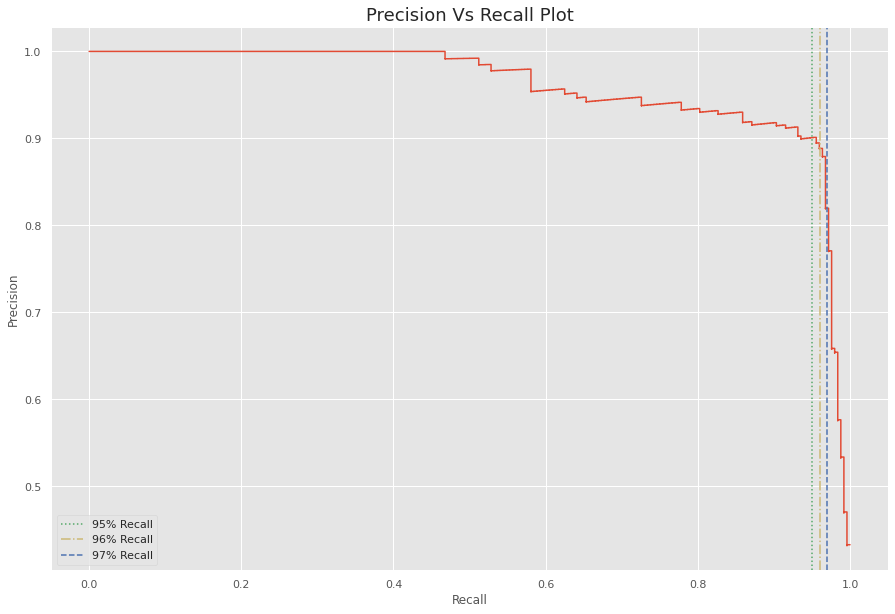

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
pr_display = PrecisionRecallDisplay(precision=precisions, recall=recalls).plot(ax=ax)
plt.axvline(x=0.95, c='g', linestyle=':', label='95% Recall')
plt.axvline(x=0.96, c='y', linestyle='-.', label='96% Recall')
plt.axvline(x=0.97, c='b', linestyle='--', label='97% Recall')
plt.legend(loc='lower left')
ax.set_title('Precision Vs Recall Plot', fontsize=18)
plt.show()

In [ ]:
th = thresholds[np.argmax(precisions[recalls >= 0.96])]
th

-0.22685630316414884

In [ ]:
y_train_pred = (y_train_scores >= th).astype(int)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       578
           1       0.89      0.96      0.92       248

    accuracy                           0.95       826
   macro avg       0.94      0.96      0.95       826
weighted avg       0.96      0.95      0.95       826



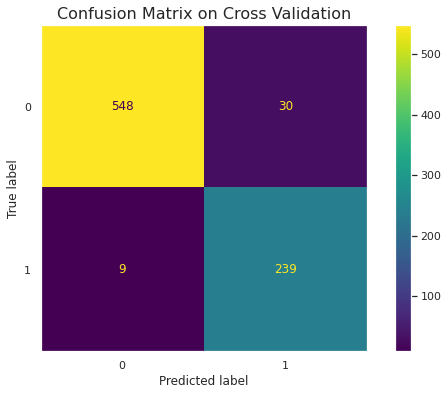

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.title('Confusion Matrix on Cross Validation', fontsize=16)
plt.show()

In [ ]:
class CustomSVC(BaseEstimator):
    def __init__(self, threshold, **kwargs):
        self.threshold = threshold
        self.svc = SVC(**kwargs)
    def fit(self, X, y):
        self.svc.fit(X, y)
        return self
    def predict(self, X):
        y_pred = (self.svc.decision_function(X) >= self.threshold).astype(int)
        return y_pred

In [ ]:
model_pipeline = Pipeline([
    ('transformer', col_trans),
    ('svm', CustomSVC(threshold=th, C=8.75, gamma=0.085))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['office_distance_from_house',
                                                   'bonus_salary_percentage',
                                                   'overtime_hour',
                                                   'company_latitude',
                                                   'company_longitude']),
                                                 ('cat', OneHotEncoder(),
                                                  ['education_level'])])),
                ('svm', CustomSVC(threshold=-0.22685630316414884))])

In [ ]:
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       146
           1       0.89      0.97      0.93        61

    accuracy                           0.96       207
   macro avg       0.94      0.96      0.95       207
weighted avg       0.96      0.96      0.96       207



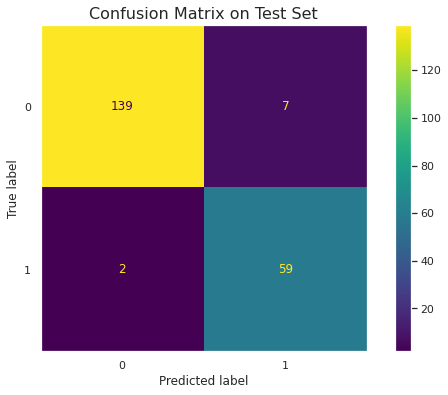

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.title('Confusion Matrix on Test Set', fontsize=16)
plt.show()

In [ ]:
results = permutation_importance(model_pipeline, X_train, y_train, n_repeats=10, scoring=['f1', 'precision', 'recall'])

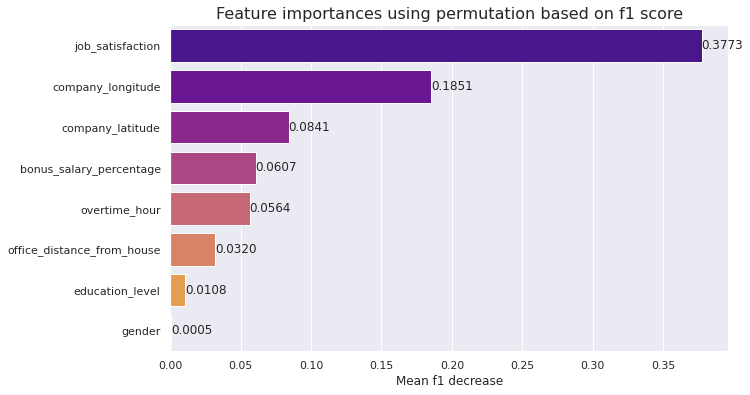

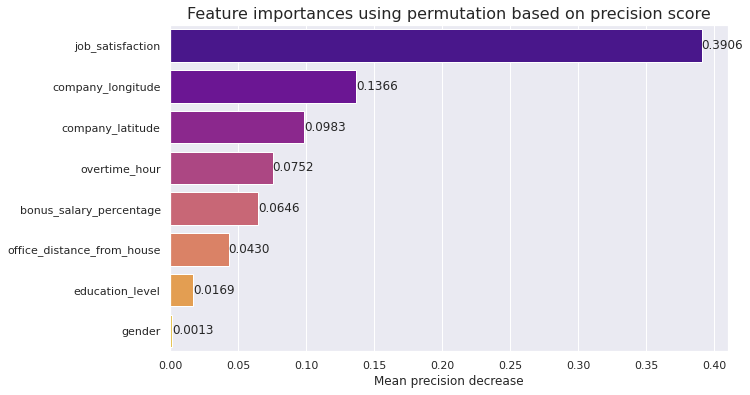

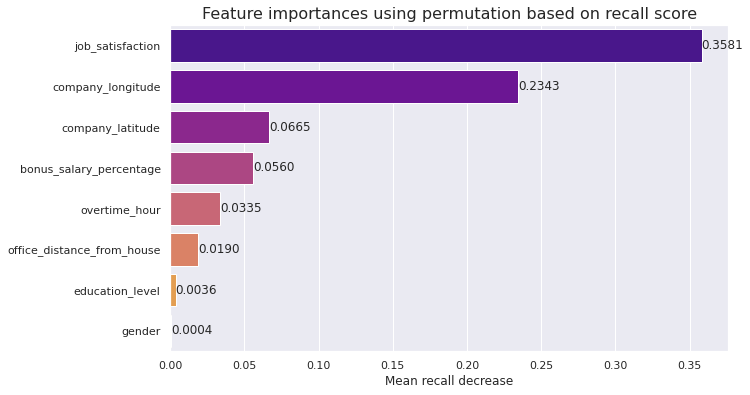

In [ ]:
for scorer, result in results.items():
    importances = pd.Series(np.abs(result.importances_mean), index=X_train.columns.values)
    importances.sort_values(ascending=False, inplace=True)

    ax = sns.barplot(x=importances.values, y=importances.index, palette='plasma')
    ax.set_title("Feature importances using permutation based on " + scorer + ' score',
                 fontsize=16)
    ax.bar_label(ax.containers[0], fmt='%.4f')
    ax.set_xlabel("Mean {} decrease".format(scorer))
    plt.show()

## Jawaban:

### Nomor 1.

EDA dilakukan hanya pada *training set*, karena kami menganggap *test set* sebagai data yang baru. Sehingga, tidak akan terjadi *data leakage*.

Berikut adalah insights yang kami temui:

1. Tingkat '*Churn*' dari karyawan perusahaan lebih condong ke tidak *Churn* (karyawan tidak pindah) daripada *Churn* (karyawan pindah). Dengan perbandingan rasio Churn dengan tidak Churn yaitu, 309 : 724 (dari 1033 karyawan, 309 memilih untuk pindah),atau sekitar 30% dari total karyawan memilih untuk pindah. Hal ini dapat dilihat dari *bar graph* berikut.


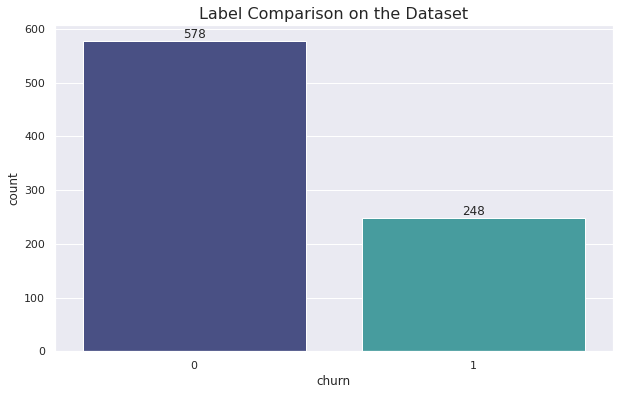

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

ax = sns.countplot(x=df_train['churn'], palette='mako')
ax.bar_label(ax.containers[0])
ax.set_title('Label Comparison on the Dataset', fontsize=16)
plt.show()

2. Karyawan yang memberi penilaian tingkat kepuasan kerja dengan skor 0-2 condong untuk Churn (pindah), sedangkan karyawan yang memberi tingkat kepuasan kerja dengan skor 3-5 condong untuk tidak Churn (tidak pindah).

3. Rasio perbandingan karyawan yang Churn dengan karyawan yang tidak Churn berdasarkan tingkat pendidikannya adalah sebagai berikut ;
  - *Bachelor/diploma* = 86 : 137 (dari 223 karyawan, 86 karyawan memilih untuk pindah), atau sekitar 39% dari total karyawan dengan tingkat pendidikan *bachelor/diploma* memilih untuk pindah.
  - *Masters degree* = 37 : 145 (dari 182 karyawan, 37 karyawan memilih untuk pindah), atau sekitar 20% dari total karyawan dengan tingkat pendidikan *masters degree* memilih untuk pindah.
  - *Higher education* = 1 : 9 (dari 10 karyawan, 1 karyawan memilih untuk pindah), atau 10% dari total karyawan dengan tingkat pendidikan *higher education* memilih untuk pindah.
  - *High school* = 1 : 5 (dari 6 karyawan, 1 karyawan memilih untuk pindah), atau sekitar 17% dari total karyawan dengan tingkat pendidikan *high school* memilih untuk pindah.

  Dari keempat kategori tingkat pendidikan tersebut, dapat disimpulkan karyawan yang memilih untuk pindah didominasi secara berurutan dari tingkat pendidikan *bachelor/diploma, masters degree, high school, lalu higher education.*

4. Rasio perbandingan karyawan yang Churn dengan karyawan yang tidak Churn berdasarkan *gender*-nya adalah sebagai berikut ;
  - Perempuan = 29 : 72 (dari 101 karyawan perempuan, 29 karyawan perempuan memilih untuk pindah), atau sekitar 29% karyawan perempuan memilih untuk pindah.
  - Laki-laki = 66 : 145 (dari 211 karyawan laki-laki, 66 karyawan laki-laki memilih untuk pindah), atau sekitar 46% karyawan laki-laki memilih untuk pindah.

  Berdasarkan pengelompokan gender tersebut, dapat disimpulkan karyawan laki-laki cenderung memilih untuk pindah daripada karyawan perempuan.

  Dari ketiga *insight* tersebut, dapat dilihat dengan *bar chart* di bawah ini.

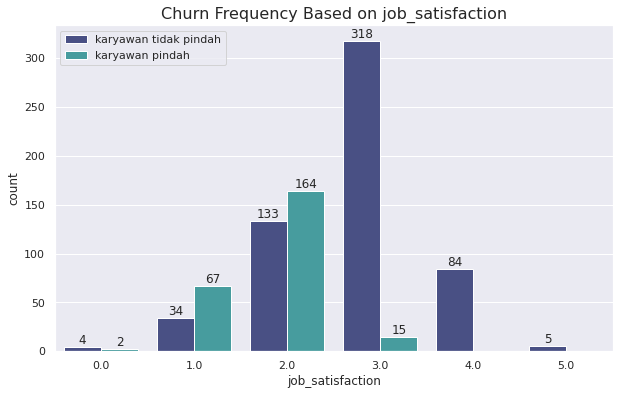

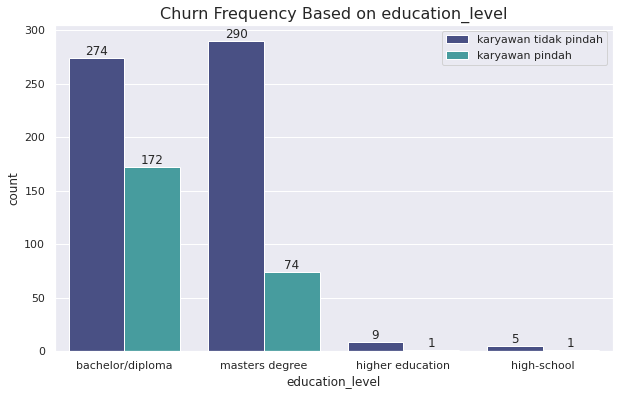

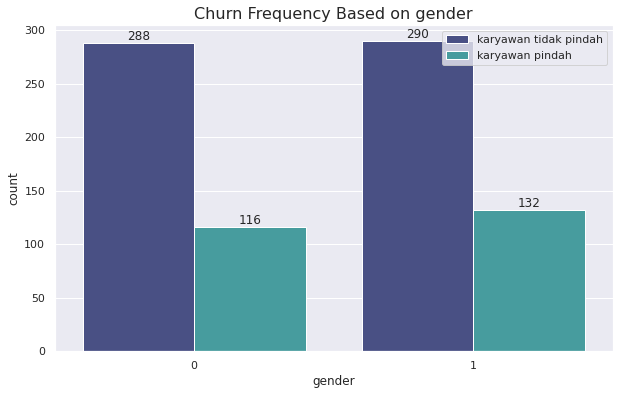

In [ ]:
for col in ['job_satisfaction', 'education_level', 'gender']:
    ax = sns.countplot(x=col, hue='churn', data=df_train, palette='mako')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('Churn Frequency Based on {}'.format(col), fontsize=16)
    plt.legend(['karyawan tidak pindah','karyawan pindah'])
    plt.show()

5. Karyawan laki-laki lebih banyak memberi skor 0-2 daripada karyawan perempuan dalam penilaian tingkat kepuasan kerja, sedangkan karyawan perempuan lebih banyak memberi skor 3-5 daripada laki-laki dalam penilaian tingkat kepuasan kerja.
2. Karyawan dengan tingkat pendidikan *bachelor/diploma, masters degree, high school*, lebih didominasi oleh laki-laki, sedangkan karyawan dengan tingkat pendidikan *higher education* setara antara laki-laki dan perempuan.

  Kedua *insight* ini dapat dilihat dari *bar chart* berikut.

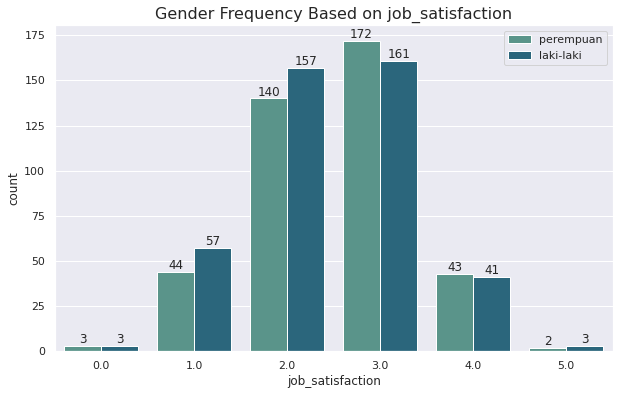

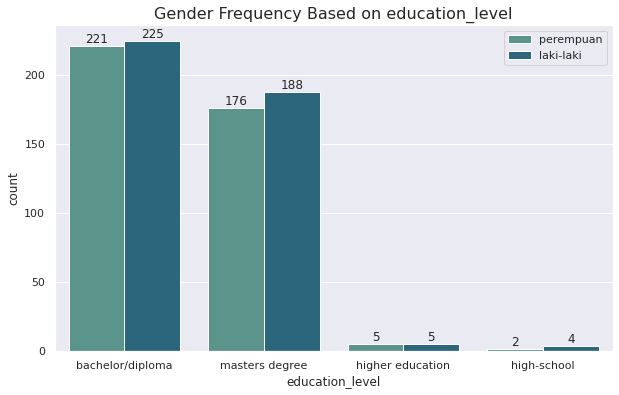

In [ ]:
for col in ['job_satisfaction', 'education_level']:
    ax = sns.countplot(x=col, hue='gender', data=df_train, palette='crest')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.set_title('Gender Frequency Based on {}'.format(col), fontsize=16)
    plt.legend(['perempuan', 'laki-laki'])
    plt.show()

7. - Karyawan dengan tingkat pendidikan *bachelor/diploma* paling banyak memberi skor 2 dalam penilaian tingkat kepuasan kerja.
  - Karyawan dengan tingkat pendidikan *masters degree* paling banyak memberi skor 3 dalam penilaian tingkat kepuasan kerja.
  - Karyawan dengan tingkat pendidikan *higher education* paling banyak memberi skor 3 dalam penilaian tingkat kepuasan kerja.
  - Karyawan dengan tingkat pendidikan *high-school* paling banyak memberi skor 3 dalam penilaian tingkat kepuasan kerja.

  Hal ini dapat dilihat dari *bar chart* di bawah ini.

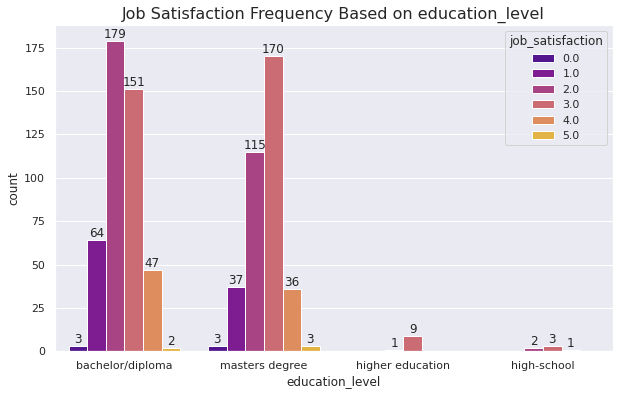

In [ ]:
ax = sns.countplot(x='education_level', hue='job_satisfaction', data=df_train, palette='plasma')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
ax.legend(loc='upper right', title='job_satisfaction')
ax.set_title('Job Satisfaction Frequency Based on education_level'.format(col), fontsize=16)
plt.show()

8. Persebaran lokasi dari perusahaan tempat para karyawan bekerja terletak di benua Amerika tepatnya di negara Amerika Serikat. 
2. Jika kita lihat dari titik pusat persebaran, maka banyaknya karyawan yang memutuskan untuk pindah dari perusahaan tempat ia bekerja berasal dari sebelah kanan titik pusat persebaran, seperti di area Chicago, Michigan, Toronto, Ohio, West Virginia, Virginia, Washington D.C, Maryland. Kemudian, untuk wilayah sisanya para karyawan memilih untuk bertahan di perusahaan. 
3. Kita tidak dapat menyimpulkan secara mutlak bahwa kepindahan dari karyawan disebabkan akibat kepuasan terhadap pekerjaan karena jika kita lihat untuk beberapa titik yang nilai *Churn*-nya bernilai 0, terdapat beberapa nilai *job_satisfaction* yang bernilai kecil, tetapi mereka tetap bertahan.

  *Insight* di atas berdasarkan visualisasi di bawah ini.

In [ ]:
fig = px.scatter_mapbox(df, lat="company_latitude", lon="company_longitude", color="churn",
                        size="job_satisfaction", 
                        color_discrete_sequence=px.colors.sequential.Viridis, 
                        size_max=15, zoom=2.5, width=1280, height=720,
                        mapbox_style="carto-positron")
fig.update_layout(title = 'Company Location', title_x=0.5)

fig.show()

# Scroll pada gambar untuk zoom in atau out, klik dan drag untuk menggeser gambar

In [ ]:
mean_df = df.describe().loc[['mean'], ['company_latitude', 'company_longitude', 'job_satisfaction']]
fig = px.scatter_mapbox(mean_df, lat="company_latitude", 
                        lon="company_longitude", size='job_satisfaction',
                        color_discrete_sequence=px.colors.sequential.Viridis, 
                        size_max=15, zoom=2.5, width=640, height=480,
                        mapbox_style="carto-positron")
fig.update_layout(title = 'Mean Company Location', title_x=0.5)
fig.show()

11. Untuk fitur office_distance_from_house, bonus_salary_percentage, overtime_hour yang disandingkan dengan fitur Churn terlihat bahwa terdapat beberapa data outlier pada ketiga fitur tersebut, akan tetapi disini data outlier tersebut tidak akan ditangani/diganti/dihilangkan karena jika kita lihat pada visualisasi histogram di bawah ini, terlihat bahwa *data outlier* tersebut tidak terlalu jauh perbedaannya dengan data di sekitarnya sehingga kami mengambil kesimpulan data outlier tersebut tidak terlalu sensitif dan tidak perlu untuk ditangani atau dengan kata lain tetap orisinil.

  Hal tersebut dapat dilihat pada *boxplot* di bawah ini.

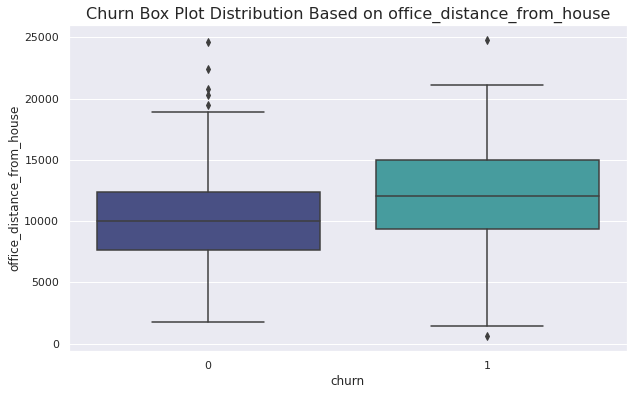

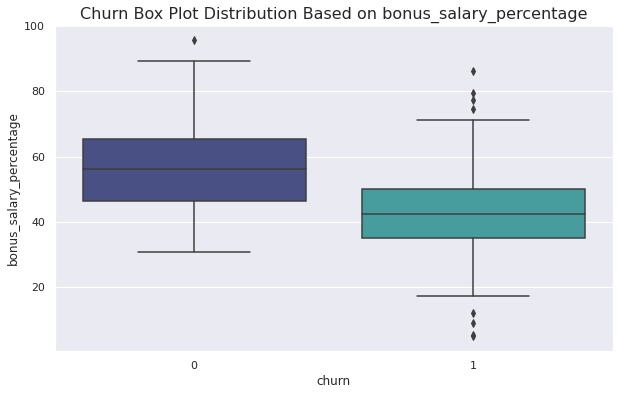

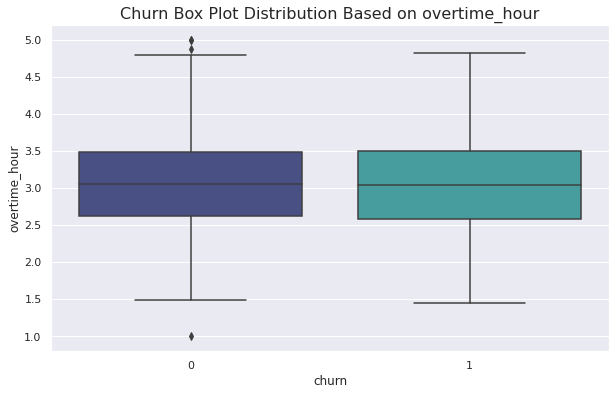

In [ ]:
for col in ['office_distance_from_house', 'bonus_salary_percentage', 'overtime_hour']:
    ax = sns.boxplot(x='churn', y=col, data=df_train, palette='mako')
    ax.set_title('Churn Box Plot Distribution Based on {}'.format(col), fontsize=16)
    plt.show()

12. Untuk histogram fitur *office_distance_from_house* terhadap *Churn*, terlihat bahwa karyawan yang memutuskan untuk pindah didominasi oleh karyawan yang memiliki jarak tempuh dari rumah ke kantor di atas 5000 meter, namun jumlahnya tidak terlalu banyak jika dibandingkan dengan karyawan yang menetap untuk jarak tempuh yang sama.
2. Untuk histogram kedua, terlihat bahwa karyawan yang memilih untuk pindah sebagian besar mendapatkan bonus gaji yang tidak terlalu besar jika dibandingkan dengan karyawan yang menetap.
3. Untuk histogram ketiga, terlihat bahwa banyaknya karyawan yang memilih untuk bertahan lebih banyak jumlahnya dibandingkan dengan yang pindah berdasarkan distribusi jam lembur yang sama.

  *Insight* di atas berdasarkan histogram di bawah ini.

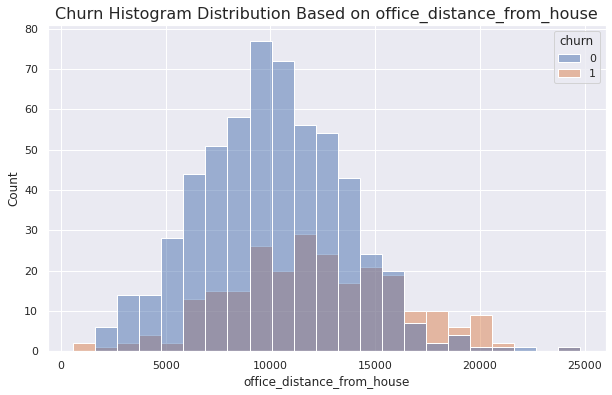

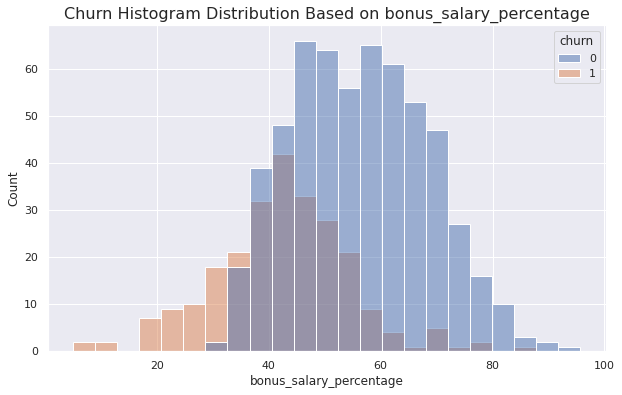

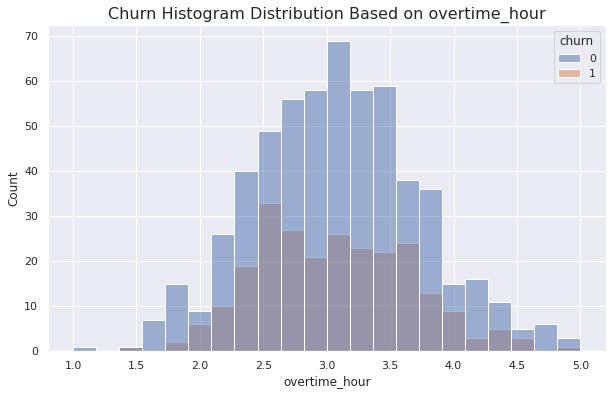

In [ ]:
for col in ['office_distance_from_house', 'bonus_salary_percentage', 'overtime_hour']:
    ax = sns.histplot(x=col, data=df_train, hue='churn')
    ax.set_title('Churn Histogram Distribution Based on {}'.format(col), fontsize=16)
    plt.show()

### Nomor 2.

- Kami melakukan standardisasi data menggunakan metode *Standard Scaler* pada kolom ; *office distance from house, bonus salary percentage, overtime hour, company latitude, company longitude*, karena untuk mempermudah proses *training data* tipe konntinu, agar data yang digunakan tidak memiliki penyimpangan yang besar. 

- Kemudian, kami melakukan *encoding* data menggunakan metode *one hot encoding* pada kolom ; *education level*, karena untuk mempermudah proses *training data* tipe kategorik, agar data yang digunakan direpresentasikan sebagai vektor biner yang bernilai integer. 

- Kemudian, kedua metode tersebut disatukan menggunakan metode *ColumnTransformer* dari *library scikit-learn*. Ketiga metode tersebut dapat dilihat dari *syntax* pada *cell* di bawah ini.

In [ ]:
col_trans = ColumnTransformer([
    ("num", StandardScaler(), num_col),
    ("cat", OneHotEncoder(), cat_col),
], remainder='passthrough')

X_train_prepared = col_trans.fit_transform(X_train)

### Nomor 3.


- *False Positive* dari kasus ini adalah ketika model memprediksi bahwa karyawan akan berhenti dari kantor asal, sedangkan realitanya karyawan tidak berhenti dari kantor asal. Hal ini disebabkan karena *class* 1 (positif) pada data menandakan bahwa karyawan berhenti, sedangkan *class* 0 (negatif) pada data menandakan bahwa karyawan tidak berhenti.
- *False Negative* dari kasus ini adalah ketika model memprediksi bahwa karyawan tidak berhenti dari kantor asal, sedangkan realitanya karyawan berhenti dari kantor asal.
- Dalam kasus ini, tipe 'kesalahan' yang lebih penting untuk diperhatikan adalah *False Negative*, karena ketika *False Negative* bernilai tinggi, maka perusahaan akan berekspektasi (berdasarkan prediksi model) bahwa banyak karyawan yang tidak ingin berhenti dari kantornya, tetapi realitanya karyawan akan berhenti dari kantor. Hal tersebut menyebabkan perusahaan akan mengeluarkan biaya yang lebih banyak serta waktu dan tenaga untuk mencari dan merekrut karyawan baru, karena adanya kesalahan model dalam memprediksi karyawan yang akan berhenti dari kantor. Sebaliknya, jika *False Positive* yang bernilai besar maka hal tersebut tidak akan terlalu berpengaruh dalam masalah keuangan perusahaan karena karyawan tidak akan berhenti dari kantor, sehingga perusahaan tidak perlu mencari & merekrut karyawan baru.

### Nomor 4.

**Penjelasan singkat**:

- Kami menggunakan model *Machine Learning*: *Support Vector Machine* (SVM) dengan kernel *Radial Basis Function* (RBF) serta hyperparameter regularisasi $C=8.75$ dan $\gamma = 0.085$. Kami menggunakan SVM karena masalah *machine learning* yang dihadapi pada dataset *employee churn* adalah masalah klasifikasi biner. SVM merupakan salah satu model yang sangat baik untuk membuat prediksi klasifikasi biner.
- Untuk mengevaluasi model tersebut, kami menggunakan metrik *recall*, f1-*score*, *precision*, dan akurasi. Tingkat metrik yang diutamakan berurutan, dimulai dari *recall* (paling diutamakan) sampai akurasi (paling tidak diutamakan). Urutan metrik tersebut dipilih karena kami lebih mementingkan *false negative* dibanding *false positive* (seperti pada jawaban nomor 3). Akurasi adalah metrik yang paling tidak kami utamakan karena jumlah data dengan *class* 0 kurang lebih sebanyak 70% dari total data, sedangkan jumlah data dengan *class* 1 kurang lebih hanya sebanyak 29%. Sehingga, penggunaan metrik akurasi tidak bisa diandalkan (misal, model memprediksi semua data memiliki *class* 0, maka sudah diperoleh akurasi 70%).
- Hasil evaluasi dari model tersebut pada *test set* adalah sebagai berikut:
    - *Recall*: 97%
    - F1-*Score*: 93%
    - *Precision*: 89%
    - Akurasi: 96%

**Penjelasan detail**:

Tahapan dalam membuat model SVM kami adalah sebagai berikut.
1. Kami menggunakan *cross validation* untuk mencari algoritma *machine learning* yang menghasilkan *recall* terbaik. Algoritma - algoritma ML yang dicek adalah *Logistic Regression, Random Forest*, SVM, KNN, dan *Gradient Boosting*. Hyperparameter yang digunakan pada algoritma - algoritma ML di *cross validation* pertama ini adalah hyperparameter *default* dari scikit-learn. *Recall* tertinggi diperoleh SVM, yaitu sebesar 94,33%. Tahap pertama ini dapat dilihat pada *code cell* dibawah ini.

In [ ]:
for model in [LogisticRegression(), 
              RandomForestClassifier(), 
              SVC(), 
              KNeighborsClassifier(), 
              GradientBoostingClassifier()]:
    
    print(model, ':', cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='recall').mean())

LogisticRegression() : 0.8788571428571428
RandomForestClassifier() : 0.931265306122449
SVC() : 0.9433469387755103
KNeighborsClassifier() : 0.9231020408163264
GradientBoostingClassifier() : 0.9393469387755102


2. *Tuning* hyperparameter SVM. Hyperparameter SVM yang kami *tuning* adalah hyperparameter yang berfungsi untuk regularisasi, yaitu $C$ dan gamma ($\gamma$), menggunakan metode *Grid Search CV (Cross Validation)*, dengan CV sebanyak 5 serta *scoring*-nya adalah *recall* (*scoring* adalah metrik objektifn dari *grid search*). *Grid Search* kami lakukan sebanyak tiga kali, untuk mengurangi lama waktu komputasi. Dimana, *list* hyperparameter yang dituning adalah sebagai berikut:
    - *Tuning* pertama: $C = [0.002, 0.02, 0.2, 2.0, 20, 200]$, $\gamma = [0.002, 0.02, 0.2, 2.0, 20, 200,$ 'scale', 'auto']
    - *Tuning* kedua: $C = [10,12,14,16,18,20,22,24,26,28,30]$, $\gamma = [0.02, 0.04, 0.06, 0.08]$
    - *Tuning* ketiga: $C = [8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75,11]$, $\gamma = [0.07,0.075,0.08,0.085,0.09,0.095,0.1]$
    
    Diperoleh hyperparameter yang menghasilkan *recall* terbaik adalah $C=8.75$ dan $\gamma=0.085$, sehingga akan digunakan hyperparameter tersebut.

3. Mencari *threshold* (batas keputusan dari SVM dalam memprediksi *class* dari sampel). Ketika SVM mencari prediksi *class* dari sebuah sampel, formula yang digunakan secara *default* oleh scikit-learn adalah:

   $y_{\text{pred}}=$
   $\begin{cases}
    1 & \text{if } \vec{w}.\vec{x} + b \geq 0 \\
    0 & \text{if } \vec{w}.\vec{x} + b < 0
\end{cases}$

   dimana, $\vec{w}$ dan $b$ adalah parameter dari SVM dan $\vec{x}$ adalah sampel. *Threshold* pada formula diatas adalah 0, yaitu nilai yang akan menentukan prediksi *class* dari suatu sampel. Sehingga, kita dapat mengeneralisasi formula diatas menjadi:

   $y_{\text{pred}}=$
   $\begin{cases}
    1 & \text{if } \vec{w}.\vec{x} + b \geq \text{threshold} \\
    0 & \text{if } \vec{w}.\vec{x} + b < \text{threshold}
\end{cases}$

   *Threshold* akan berpengaruh dalam *Precision/Recall trade-off*. Misal, kita gunakan *threshold* sebesar $a$, diperoleh *precision* sebesar 90% dan *recall* sebesar 70%. Lalu, kita ganti *threshold* menjadi $a+1$, maka kita dapat memperoleh *precision* (misal) yang lebih kecil dari 90%, tetapi *recall* dapat lebih besar dari 70% (bahkan melebihi *precision*). Jadi, *Precision/Recall trade-off* adalah suatu kondisi ketika kita mencari nilai dari *threshold* untuk memaksimalkan nilai *precision* atau *recall*, sesuai dengan objektif kita.
   
   Disini, kami ingin memaksimalkan *recall* (sesuai dengan objektif kami ingin lebih memperhatikan *false negative*), tetapi tetap memperhatikan juga *precision* agar kesalahan model tidak terlalu besar.
   
   Untuk mencari nilai *threshold* yang diinginkan, kita perlu menggunakan *method decision function*, bukan *predict* yang akan langsung meng-*output* *class* dari suatu sampel. Dengan menggunakan *decision function*, model akan meng-*output* di sebelah mana sampel berada dan jarak antara sampel dengan *decision boundary* dari SVM.
   
   Setelah itu, kami membuat plot *precision/recall curve* yang akan membantu kami dalam menentukan *threshold* yang tepat dalam memaksimalkan *recall*, tetapi juga memiliki *precision* yang baik.
   
   Proses pada tahap ini dapat dilihat pada dua *code cell* dibawah.

In [ ]:
y_train_scores = cross_val_predict(SVC(C=8.75, gamma=0.085), X_train_prepared, y_train, cv=5, method='decision_function')

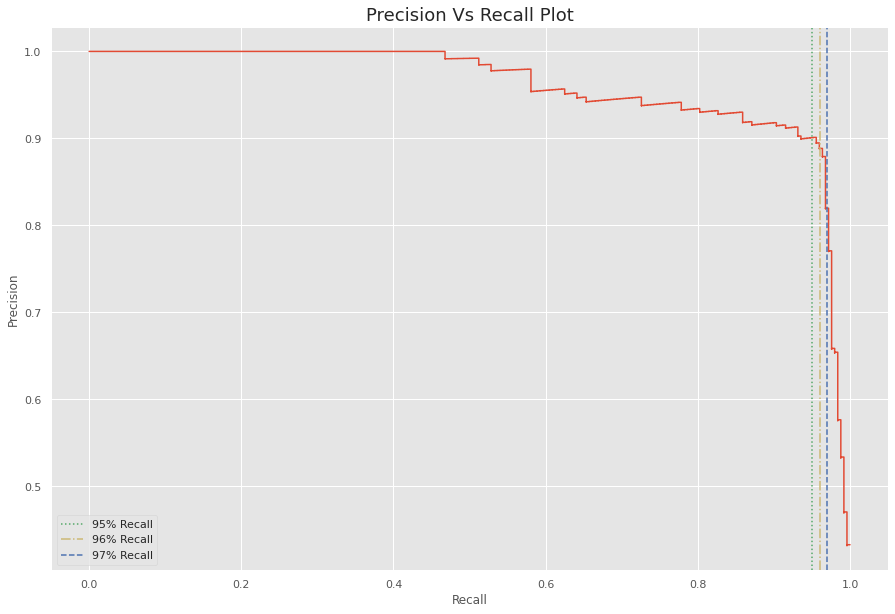

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
pr_display = PrecisionRecallDisplay(precision=precisions, recall=recalls).plot(ax=ax)
plt.axvline(x=0.95, c='g', linestyle=':', label='95% Recall')
plt.axvline(x=0.96, c='y', linestyle='-.', label='96% Recall')
plt.axvline(x=0.97, c='b', linestyle='--', label='97% Recall')
plt.legend(loc='lower left')
ax.set_title('Precision Vs Recall Plot', fontsize=18)
plt.show()

Pada plot diatas, terlihat bahwa hingga *recall* mencapai 95%, *precision* cenderung stabil (diatas 90%). Namun, ketika *recall* lebih dari 96%, *precision* menurun cukup drastis. Pada saat *recall* tepat sebesar 96%, *precision* memiliki nilai yang masih cukup bagus (hampir mendekati 90%). Sehingga, akan digunakan *threshold* yang menghasilkan *recall* sebesar 96% tersebut. Diperoleh *threshold* sebesar $-0.2269$, yang dapat dilihat pada *code cell* dibawah.

In [ ]:
th = thresholds[np.argmax(precisions[recalls >= 0.96])]
th

-0.22685630316414884

4. Evaluasi model pada  *cross validation* data *training* menggunakan nilai *threshold* yang sudah diperoleh. Diperoleh *recall* sebesar 96%, f1-*score* sebesar 92%, *precision* sebesar 89%, dan akurasi sebesar 95%. Selain itu, juga diperoleh *False Positive* sebanyak 30 dan *False Negative* sebanyak 9. Berdasarkan hasil evaluasi ini, kami cukup yakin bahwa model sudah sangat bagus, karena telah mendapatkan *recall* sebesar 96% dengan nilai f1-*score* dan *precision* yang juga cukup besar, sehingga model ini adalah model final kami. Hasil evaluasi dapat dilihat pada dua *code cell* dibawah.

In [ ]:
y_train_pred = (y_train_scores >= th).astype(int)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       578
           1       0.89      0.96      0.92       248

    accuracy                           0.95       826
   macro avg       0.94      0.96      0.95       826
weighted avg       0.96      0.95      0.95       826



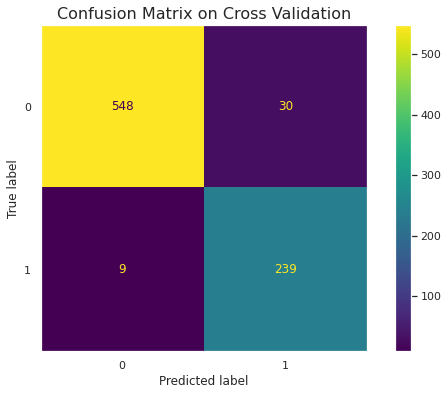

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.title('Confusion Matrix on Cross Validation', fontsize=16)
plt.show()

5. Membuat class *custom* SVM yang akan menggunakan *threshold* yang telah didapatkan sebelumnya, untuk memprediksi sampel. Proses ini dilakukan dengan memanfaatkan syntax class pada Python, dan metode BaseEstimator yang disediakan oleh scikit-learn sehingga class menjadi sebuah scikit-learn *estimator* (bukan class pada umumnya). Tahap ini dapat dilihat pada *code cell* dibawah.

In [ ]:
class CustomSVC(BaseEstimator):
    def __init__(self, threshold, **kwargs):
        self.threshold = threshold
        self.svc = SVC(**kwargs)
    def fit(self, X, y):
        self.svc.fit(X, y)
        return self
    def predict(self, X):
        y_pred = (self.svc.decision_function(X) >= self.threshold).astype(int)
        return y_pred

6. Membuat *model pipeline* untuk mempermudah ketika mendapatkan data baru masuk, sehingga proses *data preparation* dan prediksi model menjadi satu kali jalan. Selanjutnya, *pipeline* di-*train* pada data *training* yang belum dilakukan standarisasi dan *encoding*. Pembuatan *pipeline* dapat dilihat pada *code* dibawah.

In [ ]:
model_pipeline = Pipeline([
    ('transformer', col_trans),
    ('svm', CustomSVC(threshold=th, C=8.75, gamma=0.085))
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['office_distance_from_house',
                                                   'bonus_salary_percentage',
                                                   'overtime_hour',
                                                   'company_latitude',
                                                   'company_longitude']),
                                                 ('cat', OneHotEncoder(),
                                                  ['education_level'])])),
                ('svm', CustomSVC(threshold=-0.22685630316414884))])

7. Prediksi *test set* menggunakan *model pipeline* yang telah dibuat sebelumnya, serta evaluasi model pada *test set*. Pada *test set* diperoleh *recall* sebesar 97%, f1-*score* 93%, *precision* 89%, dan akurasi 96%. Selain itu, juga diperoleh *false positive* sebanyak 7 dan *false negative* sebanyak 2. Proses pada tahap ini dapat dilihat pada dua *code cell* dibawah. 

In [ ]:
y_pred = model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       146
           1       0.89      0.97      0.93        61

    accuracy                           0.96       207
   macro avg       0.94      0.96      0.95       207
weighted avg       0.96      0.96      0.96       207



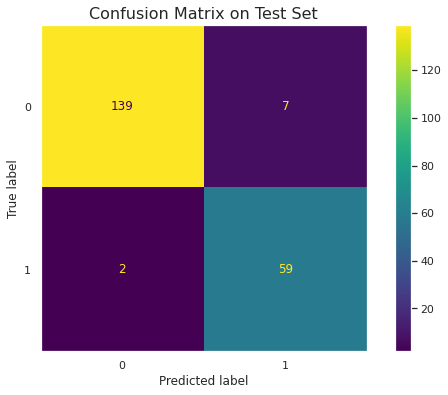

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.grid(False)
plt.title('Confusion Matrix on Test Set', fontsize=16)
plt.show()

8. Terakhir, kami menggunakan metode *permutation importances* untuk mengetahui kepentingan masing - masing fitur untuk model dalam memprediksi seorang karyawan akan pindah dari kantor atau tidak. *Permutation importances* menghitung penurunan nilai metrik yang diset ketika suatu fitur dari dataset diacak (*shuffle*). Metrik yang kami gunakan untuk metode ini adalah f1-*score*, *precision*, dan *recall*. Diperoleh, 5 fitur yang paling mempengaruhi f1-*score* dan *recall*, secara berurutan, berdasarkan metode *permutation importances* adalah job_satisfaction, company_longitude, company_latitude, bonus_salary_percentage, dan overtime_hour. Sedangkan, untuk *precision* 5 fitur teratasnya sama dengan f1-*score* dan *recall*, tetapi terdapat perbedaan urutan untuk overtime_hour dan bonus_salary_percentage (overtime_hour lebih mempengaruhi). Proses dan plot pada tahap ini dapat dilihat pada *code cell* dibawah.

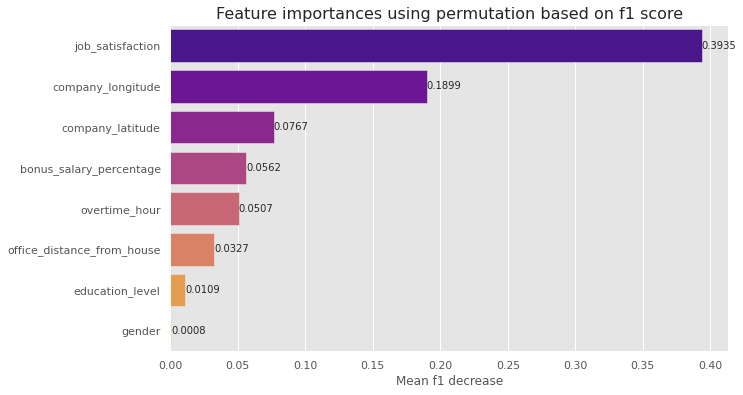

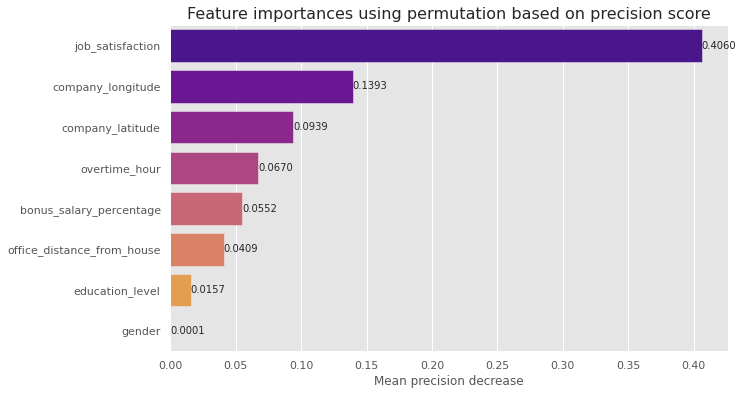

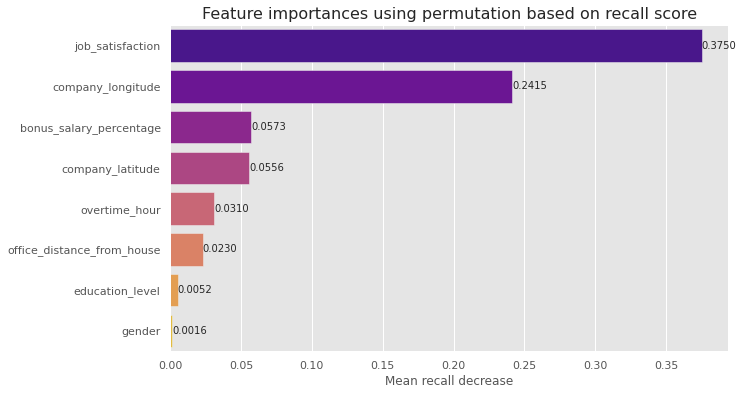

In [ ]:
results = permutation_importance(model_pipeline, X_train, y_train, n_repeats=10, scoring=['f1', 'precision', 'recall'])

for scorer, result in results.items():
    importances = pd.Series(np.abs(result.importances_mean), index=X_train.columns.values)
    importances.sort_values(ascending=False, inplace=True)

    ax = sns.barplot(x=importances.values, y=importances.index, palette='plasma')
    ax.set_title("Feature importances using permutation based on " + scorer + ' score',
                 fontsize=16)
    ax.bar_label(ax.containers[0], fmt='%.4f')
    ax.set_xlabel("Mean {} decrease".format(scorer))
    plt.show()

Sehingga, berdasarkan model SVM yang telah kami buat, dapat direkomendasikan pada perusahaan - perusahaan untuk lebih memperhatikan tingkat kepuasan karyawan terhadap pekerjaan, letak geografis kantor, jam lembur karyawan, dan bonus gaji karyawan untuk mencegah adanya karyawan yang berhenti dari kantor.